In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [31]:
import torch

from bert import tokenization
from dataloader import *
from bert_pytorch.model.bert import BERTClassificationWrapper

vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
for x, y, lengths in IMDBLoader(max_len=10, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (25000, 25000)


In [88]:
for x, y, lengths in QQPLoader(max_len=10, size=10, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (10, 10)


In [95]:
COLALoader(max_len=10, size=10, device=device, tokenizer=tokenizer).testdf.head()

Length of (Train, Test) : (10, 10)


,sentence_source,label,author_judged,sentence,file_length
477,w_80,1,NaN,John left us orders to follow Pete.,7
220,swb04,1,NaN,We gave ourselves to the cause.,6
185,s_97,1,NaN,I threw away a book that Sandy thought we had ...,11
320,swb04,1,NaN,The book surprised many people.,5
146,j_71,1,NaN,Neither Von Karajan's recording of Beethoven's...,17


In [23]:
for x, y, lengths in QNLILoader(max_len=100, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (103106, 5266)


In [28]:
for x, y, lengths in RTELoader(max_len=100, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (2490, 277)


In [78]:
for x, y, lengths in COLALoader(max_len=10, device=device, size=10, tokenizer=tokenizer).batch_iter(batch_size=2, train=False, shuffle=True):
    pass

Length of (Train, Test) : (10, 10)


In [52]:
model = BERTClassificationWrapper(device,
                                len(tokenizer.vocab),
                                hidden=10,
                                n_layers=1,
                                attn_heads=1,
                                dropout=0.1,
                                number_classes=2,
                                attention_dropout=True)

In [80]:
y_hat = model(x, lengths)
y_hat

tensor([[ 0.3060, -0.2894]], grad_fn=<AddmmBackward>)

In [61]:
w = []
for t in model.bert.transformer_blocks:
    w1 = t.input_sublayer.dropout_attention.layer_embedding
    w2 = t.output_sublayer.dropout_attention.layer_embedding
    w.append([w1, w2])

In [66]:
loss_fcn = torch.nn.CrossEntropyLoss()

In [79]:
y

tensor(0)

In [83]:
data = Path('../data/QQP')

In [85]:
df = pd.read_csv(data/'train.csv')

In [87]:
df['is_duplicate'].values

array([0., 1., 0., ..., 0., 0., 1.])

# Model + Data Loading

In [104]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)

In [122]:
model_path = 'cancel_e=0_itr=3default-model'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
dataloader = load_dataloader(m1['args'], tokenizer)

Length of (Train, Test) : (25000, 25000)


Total Time: 30.3288 
Train Time: 28.5355
Max (Validation, Train): (0.00, 1.14)


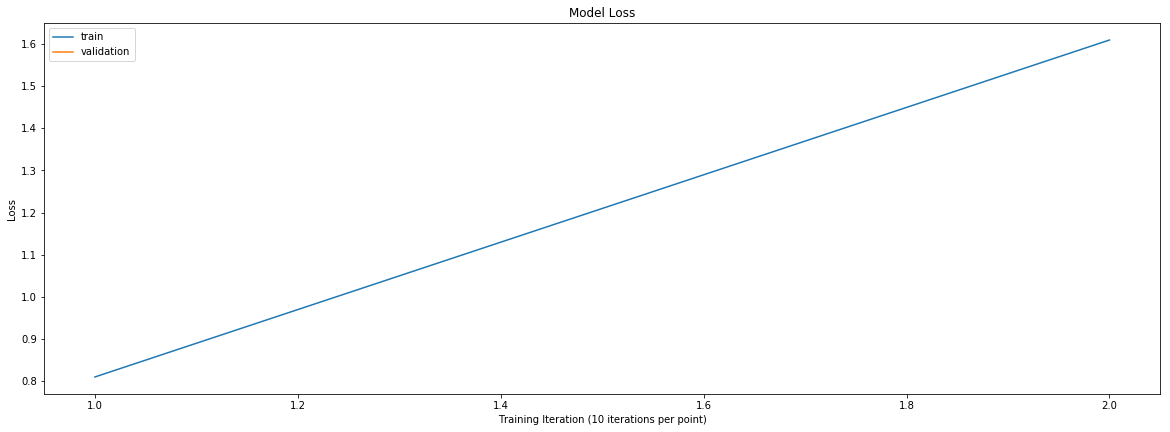

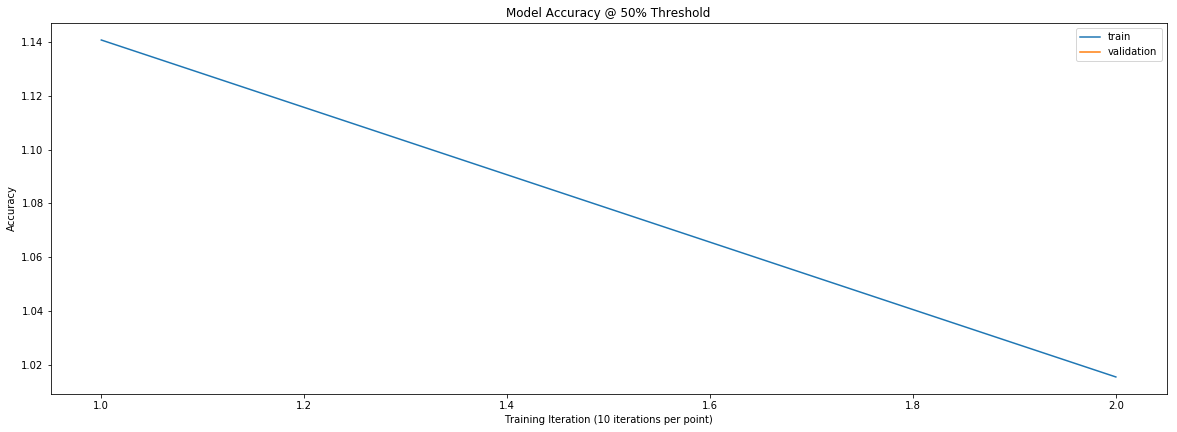

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '128',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '256',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '1',
    '--lr': '0.001',
    '--max-epoch': '30',
    '--max-sent-len': '10000',
    '--n-heads': '1',
    '--n-layers': '3',
    '--n-valid': '10000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'default-model',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '40'}


In [123]:
plot_metrics(m1, first_n=None)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])